### Load/Export Data to CSV

In [1]:
#Load relevant packages
import seaborn as sns
import os
#Load the Titanic dataset from seaborn
titanic = sns.load_dataset("titanic")
#Export the dataset to a CSV file and store in the Data folder
file_path = os.path.abspath(os.path.join(os.getcwd(), "../../", "Data"))
titanic.to_csv(os.path.join(file_path, "titanic_seaborn_data.csv"), index=False)

### Package Installation

In [2]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load the Titanic dataset from seaborn
titanic = sns.load_dataset("titanic")


In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
#Count the number of missing values in the dataset as a percentage
titanic.isnull().mean() * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [7]:
#Display the value counts of the 'age' column
titanic['age'].value_counts()

age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [8]:
#Calculate the mean of the 'age' column for each pclass
titanic.groupby('pclass')['age'].mean()
age_pclass1 = titanic[titanic['pclass'] == 1]['age'].mean()
age_pclass2 = titanic[titanic['pclass'] == 2]['age'].mean()
age_pclass3 = titanic[titanic['pclass'] == 3]['age'].mean()

In [9]:
#Fill missing values in the 'age' column with the mean age of each pclass
titanic['age'] = np.where((titanic['pclass'] == 1) & (titanic['age'].isnull()), age_pclass1, titanic['age'])
titanic['age'] = np.where((titanic['pclass'] == 2) & (titanic['age'].isnull()), age_pclass2, titanic['age'])
titanic['age'] = np.where((titanic['pclass'] == 3) & (titanic['age'].isnull()), age_pclass3, titanic['age'])

In [10]:
#Count the number of missing values in the dataset as a percentage
titanic.isnull().mean() * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age             0.000000
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [11]:
#Drop rows where 'embarked' is missing
titanic.dropna(subset=['embarked'], inplace=True)

In [12]:
#Count the number of missing values in the dataset as a percentage
titanic.isnull().mean() * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age             0.000000
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.000000
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.390326
embark_town     0.000000
alive           0.000000
alone           0.000000
dtype: float64

## Accurate Visualizations

### Age and Survival Rate

#### Find Optimal Bin Size

In [13]:
#Use Rice Rule to determine number of bins
rice_bins = np.ceil(2 * np.cbrt(len(titanic)))
rice_bins

20.0

In [14]:
#Use Freedman-Diaconis Rule to determine number of bins
bin_width = 2*((np.percentile(titanic['age'], 75) - np.percentile(titanic['age'], 25))/ np.cbrt(len(titanic)))
fd_bins = int(np.ceil((max(titanic['age']) - min(titanic['age']))/bin_width))
fd_bins

27

In [15]:
#Use Sturges' Rule to determine an appropriate number of bins
sturges_bin = np.ceil(np.log2(len(titanic['age'])) + 1)
sturges_bin

11.0

In [16]:
#Manually set bin sizes
age_min = int(titanic['age'].min())
age_max = int(titanic['age'].max())
bins = bins_3_year = list(range(age_min, age_max + 4, 3))
len(bins_3_year)

28

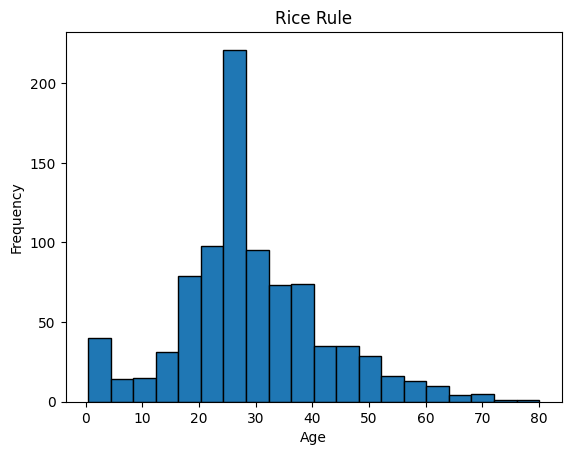

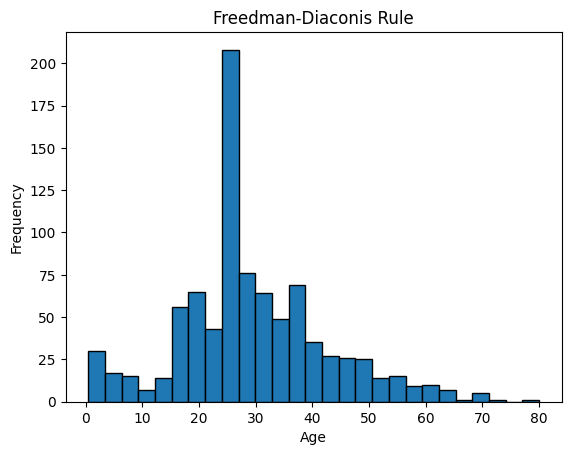

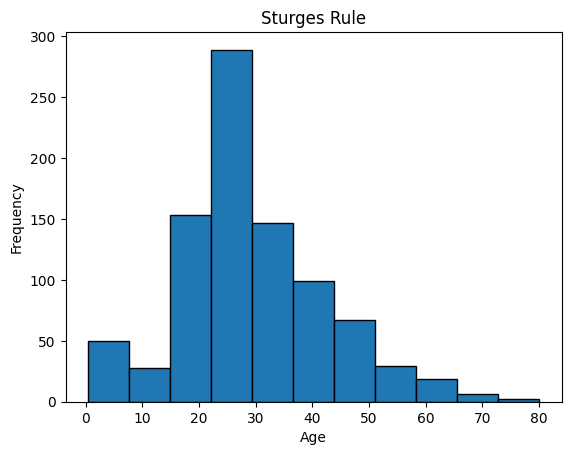

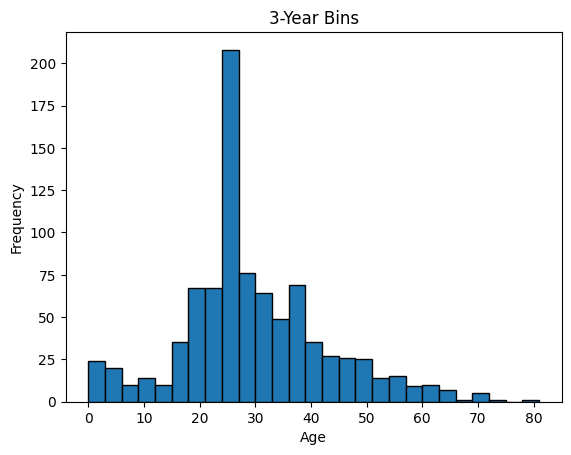

In [17]:
#Create a list of titles
titles = ['Rice Rule', 'Freedman-Diaconis Rule', 'Sturges Rule', '3-Year Bins']
#Plot the histograms for the different bin sizes
for i, bins in enumerate([int(rice_bins), int(fd_bins), int(sturges_bin), bins_3_year]):
    plt.hist(titanic['age'], bins=bins, edgecolor='black')
    plt.title(titles[i])
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()

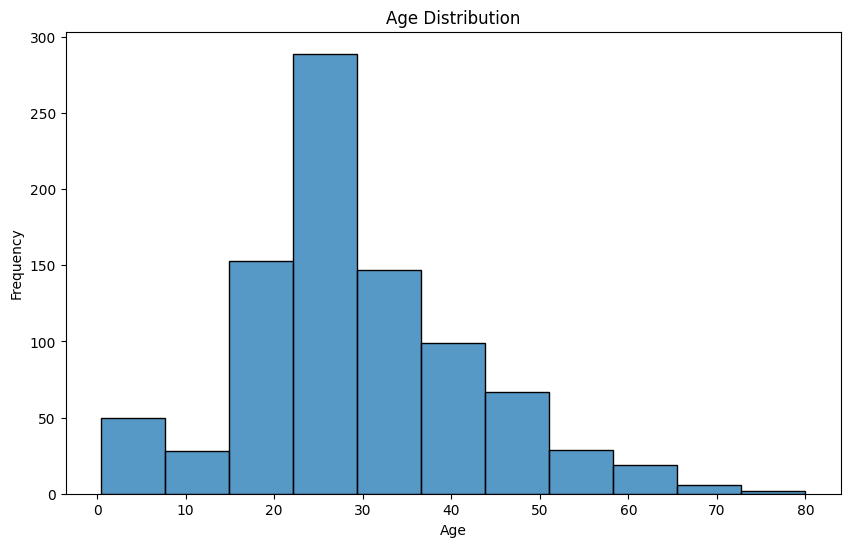

In [18]:
#Visualize the age distribution
plt.figure(figsize=(10, 6))
sns.histplot(titanic['age'], bins=int(sturges_bin))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

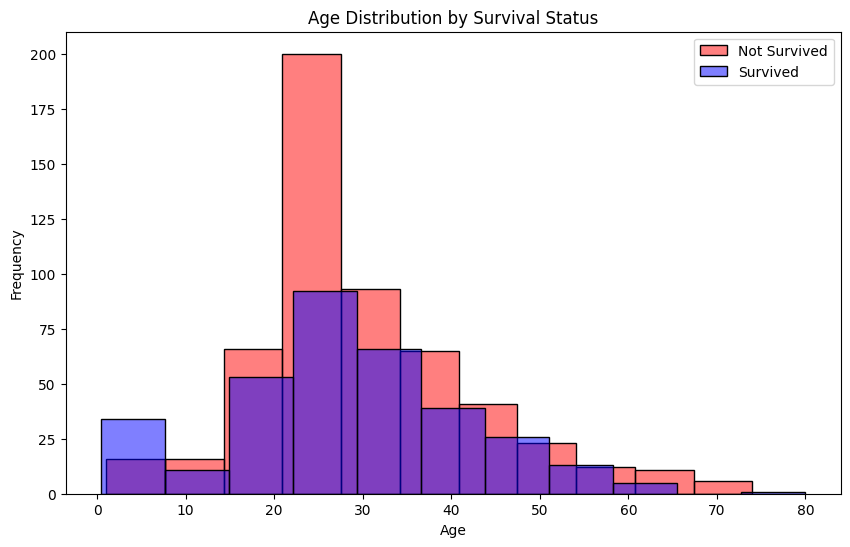

In [19]:
#Overlay survival status on the age distribution
plt.figure(figsize=(10, 6))
sns.histplot(titanic[titanic['survived'] == 0]['age'], bins=int(sturges_bin), color='red', alpha=0.5, label='Not Survived')
sns.histplot(titanic[titanic['survived'] == 1]['age'], bins=int(sturges_bin), color='blue', alpha=0.5, label='Survived')
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


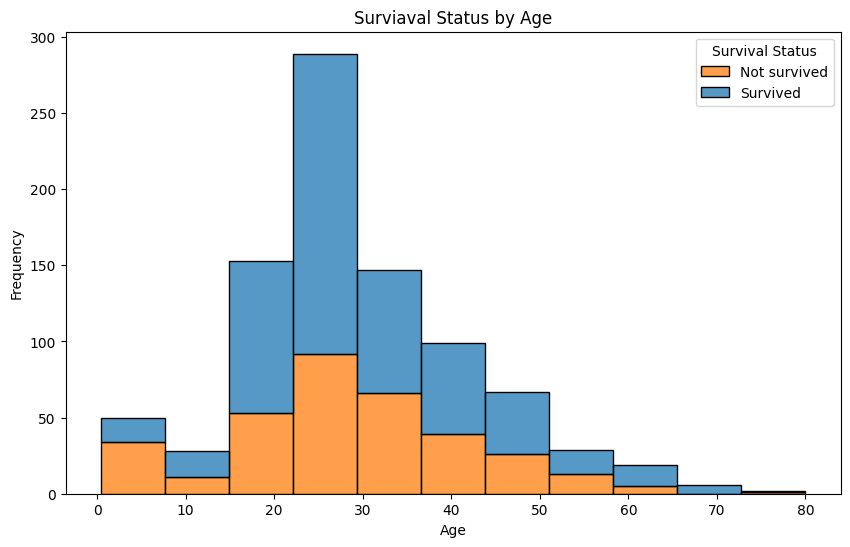

In [20]:
#Visualize the age distribution with 'score_text' as hue
plt.figure(figsize=(10, 6))
sns.histplot(titanic, x='age', hue='survived', bins = int(sturges_bin), multiple='stack')
plt.title('Surviaval Status by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title="Survival Status", labels=["Not survived", "Survived"])
plt.show()


In [21]:
#Display the counts of 'survived' for each age group
age_bins = pd.cut(titanic['age'], bins=int(sturges_bin))
age_survived = titanic.groupby(age_bins)['survived'].value_counts().unstack()
age_survived.columns = ['Not Survived', 'Survived']
age_survived['Survival Rate'] = np.round(age_survived['Survived'] / (age_survived['Survived'] + age_survived['Not Survived']) * 100, 2)
age_survived

,Not Survived,Survived,Survival Rate
age,,,
"(0.34, 7.655]",16,34,68.00
"(7.655, 14.889]",17,11,39.29
"(14.889, 22.124]",100,53,34.64
"(22.124, 29.358]",197,92,31.83
"(29.358, 36.593]",81,66,44.90
"(36.593, 43.827]",60,39,39.39
"(43.827, 51.062]",41,26,38.81
"(51.062, 58.296]",16,13,44.83
"(58.296, 65.531]",14,5,26.32


### PClass and Embark_Town Survival Rate

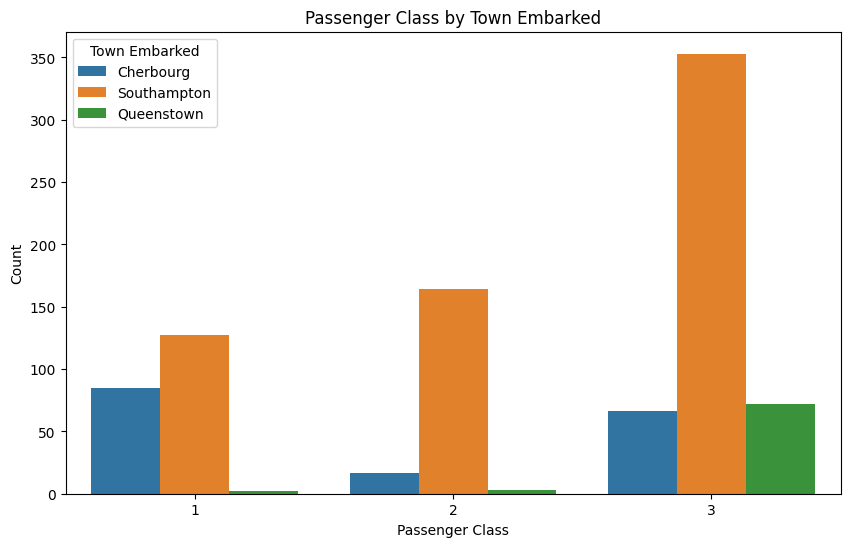

In [22]:
#Plot PClass and Embark_Town
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic, x='pclass', hue='embark_town')
plt.title('Passenger Class by Town Embarked')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Town Embarked')
plt.show()

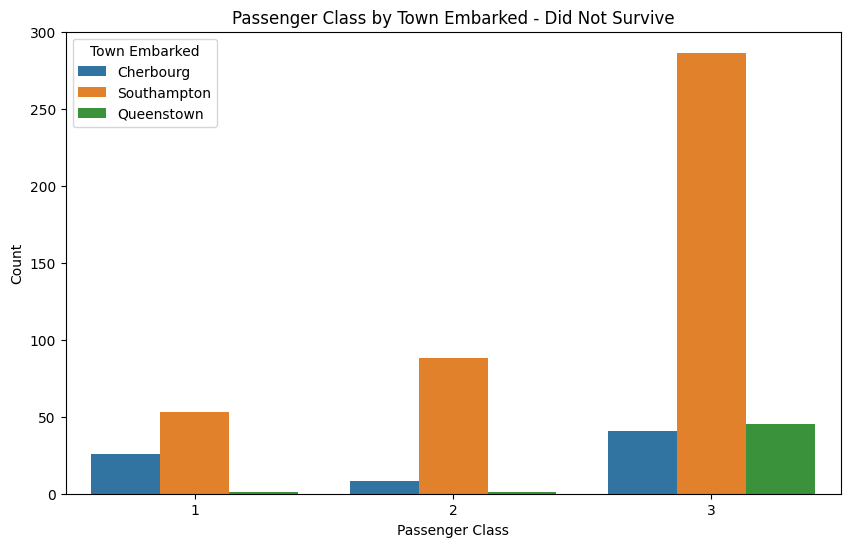

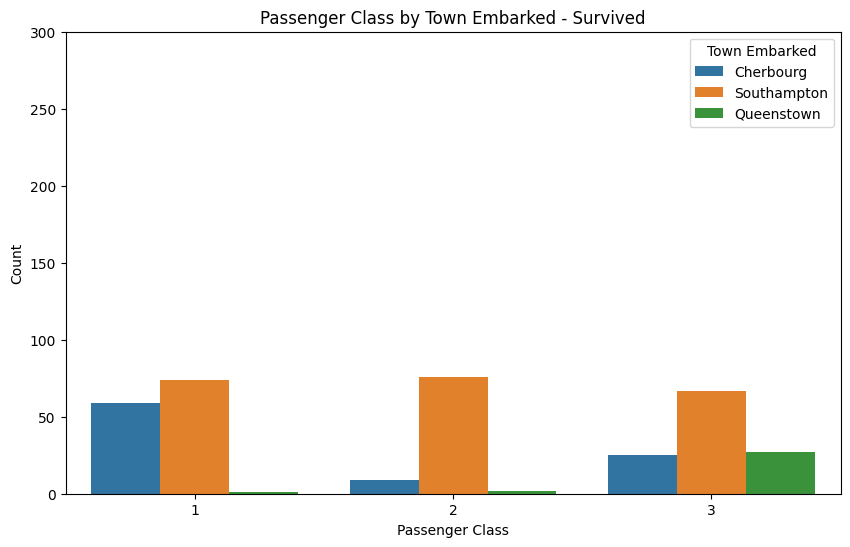

In [24]:
#Plot PClass and Embark_Town based on survival status
survival_status = ['Did Not Survive', 'Survived']
for i in range(0, 2):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=titanic[titanic['survived'] == i], x='pclass', hue='embark_town', hue_order=['Cherbourg', 'Southampton', 'Queenstown'])
    plt.title(f'Passenger Class by Town Embarked - {survival_status[i]}')
    plt.xlabel('Passenger Class')
    plt.ylabel('Count')
    plt.ylim(0, 300)
    plt.legend(title='Town Embarked')
    plt.show()

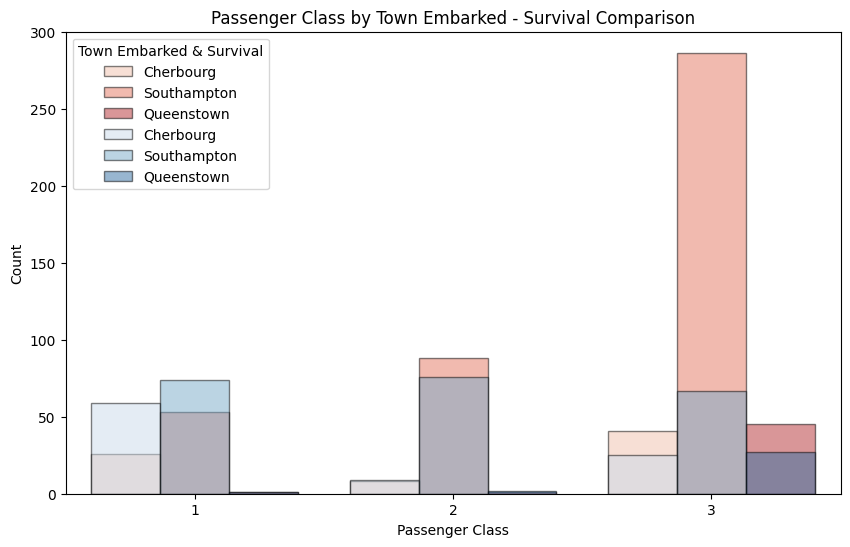

In [29]:
#Overlay the survival status on the count plot for each PClass and Embark_Town
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic[titanic['survived'] == 0], x='pclass', hue='embark_town', hue_order=['Cherbourg', 'Southampton', 'Queenstown'], alpha=0.5, palette='Reds', edgecolor = 'black')
sns.countplot(data=titanic[titanic['survived'] == 1], x='pclass', hue='embark_town', hue_order=['Cherbourg', 'Southampton', 'Queenstown'], alpha=0.5, palette='Blues', edgecolor = 'black')
plt.title('Passenger Class by Town Embarked - Survival Comparison')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.ylim(0, 300)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:3] + handles[3:], labels[:3] + labels[3:], title="Town Embarked & Survival")
plt.show()


## Misleading Visualizations

### Passenger Class, Age, and Survival

### Distribution of Survival by 'Deck'

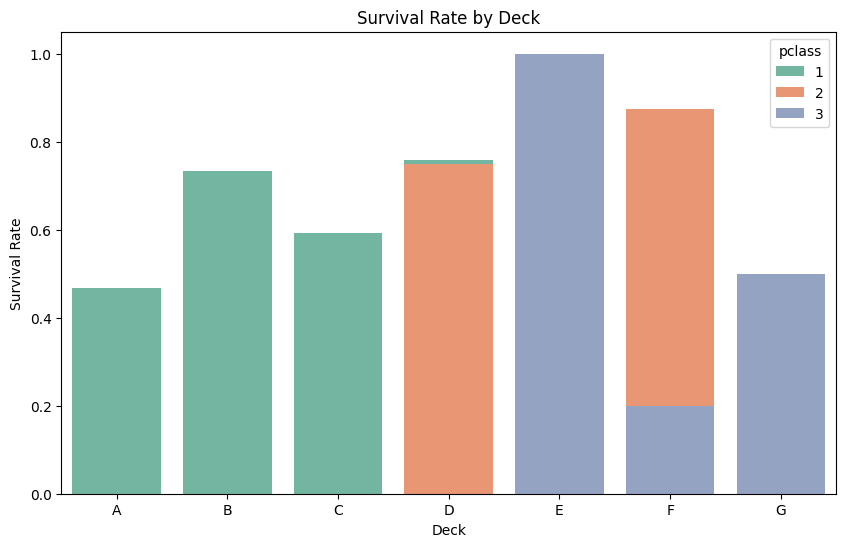

In [ ]:
#Create a plot of the Survival Rate by Deck
plt.figure(figsize=(10, 6))
sns.barplot(data=titanic, x='deck', y='survived', hue ='pclass', estimator=np.mean, errorbar=None, dodge=False, palette='Set2')
plt.title('Survival Rate by Deck')
plt.xlabel('Deck')
plt.ylabel('Survival Rate')
plt.show()

In [45]:
#Calculate the survival rate for each PClass where deck is not null
deck_survival_rate = titanic[titanic['deck'].notnull()].groupby(['pclass'])['survived'].mean().reset_index()
deck_survival_rate


,pclass,survived
0,1,0.66474
1,2,0.81250
2,3,0.50000


In [46]:
#Calculate the survival rate for each PClass
survival_rate = titanic.groupby(['pclass'])['survived'].mean().reset_index()
survival_rate

,pclass,survived
0,1,0.626168
1,2,0.472826
2,3,0.242363


How it's misleading: 
- Cherry Picking Data
- Not Representative of actual data
